# This notebook non-iid analysis...

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, GenericUnivariateSelect
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, KFold
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
# Load write dataset t100
x_t100 = pd.read_csv('datasets/exp90c_11h_v3/t100/prometheus_metrics_wide.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(x_t100.shape)
x_t100.head(5)

(40203, 433)


,timestamp,container_blkio_device_usage_total_0,container_blkio_device_usage_total_1,container_blkio_device_usage_total_2,container_blkio_device_usage_total_3,container_cpu_load_average_10s_0,container_cpu_load_d_average_10s_0,container_cpu_system_seconds_total_0,container_cpu_usage_seconds_total_0,container_cpu_user_seconds_total_0,...,node_network_up_6,node_network_up_7,inst_node_cpu_usage_0,user_cpu_usage_0,system_cpu_usage_0,memory_usage_per_container_0,network_receive_bytes_per_container_0,network_receive_bytes_per_container_1,network_transmit_bytes_per_container_0,network_transmit_bytes_per_container_1
0,1765453987,957624320,278564794368,957624320,224425136128,0,0,130117.798119,560279.845831,430162.047711,...,1,1,3.176364,1.767507,1.402323,42.401409,5826.570681,0.000000,5.498691e+03,0.000000
1,1765453988,957624320,278564802560,957624320,224425136128,0,0,130117.823299,560279.905620,430162.082321,...,1,1,3.918021,1.922152,1.630090,42.401377,4977.416141,187.313185,4.520093e+03,235.137828
2,1765453989,957624320,278564802560,957624320,224425136128,0,0,130117.823299,560279.905620,430162.082321,...,1,1,3.918021,1.922152,1.630090,42.401377,4977.416141,187.313185,4.520093e+03,235.137828
3,1765453990,957624320,278564802560,957624320,224425136128,0,0,130119.109663,560282.635944,430163.526281,...,1,1,157.731023,45.396684,40.268468,42.406305,380154.743629,81933.374271,2.881582e+06,237837.273565
4,1765453991,957624320,278564802560,957624320,224425136128,0,0,130119.886899,560285.330555,430165.443655,...,1,1,184.183937,105.239011,64.608641,42.406813,615872.886662,152397.307451,4.322042e+06,462099.874765


In [3]:
# Load y t100
y_t100 = pd.read_csv('datasets/exp90c_11h_v3/t100/20251211_115307653_w.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(y_t100.shape)
y_t100.head(5)

(40203, 45)


,timestamp,queries_num,queries_requested,errors_occurred,iter_errors_occurred,average_latency,99_9_latency_percentile,mean_rate,one_minute_rate,five_minute_rate,...,w_min,w_max,w_mean,w_std_dev,w_median,w_75th_percentile,w_95th_percentile,w_98th_percentile,w_99th_percentile,w_99_9th_percentile
0,1765453987,13,0,0,0,61,1,0.085926,0.031626,0.009124,...,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
1,1765453988,64,0,0,0,14,1,0.420243,0.031626,0.009124,...,2,3,2.078431,0.271524,2.0,2.0,3.0,3.0,3.0,3
2,1765453989,114,0,0,0,8,1,0.743676,0.031626,0.009124,...,1,3,2.029703,0.221605,2.0,2.0,2.0,3.0,3.0,3
3,1765453990,164,0,0,0,6,1,1.062917,0.031626,0.009124,...,1,3,2.046358,0.240493,2.0,2.0,3.0,3.0,3.0,3
4,1765453991,214,0,0,0,5,1,1.378039,3.163356,0.656892,...,1,3,2.054726,0.248978,2.0,2.0,3.0,3.0,3.0,3


In [4]:
# Load write dataset t300
x_t300 = pd.read_csv('datasets/exp90c_11h_v3/t300/prometheus_metrics_wide.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(x_t300.shape)
x_t300.head(5)

(40203, 433)


,timestamp,container_blkio_device_usage_total_0,container_blkio_device_usage_total_1,container_blkio_device_usage_total_2,container_blkio_device_usage_total_3,container_cpu_load_average_10s_0,container_cpu_load_d_average_10s_0,container_cpu_system_seconds_total_0,container_cpu_usage_seconds_total_0,container_cpu_user_seconds_total_0,...,node_network_up_6,node_network_up_7,inst_node_cpu_usage_0,user_cpu_usage_0,system_cpu_usage_0,memory_usage_per_container_0,network_receive_bytes_per_container_0,network_receive_bytes_per_container_1,network_transmit_bytes_per_container_0,network_transmit_bytes_per_container_1
0,1765537657,417792,297411657728,417792,250720616448,0,0,33570.609176,285430.027140,251859.417963,...,1,1,3.014904,1.823408,0.682647,39.535427,6884.633796,134.992820,6.833652e+03,1.694591e+02
1,1765537658,516096,297411657728,516096,250720616448,0,0,33570.759613,285432.080160,251861.320547,...,1,1,173.690355,52.557216,4.430046,39.588133,62953.507122,58965.600645,9.096920e+05,3.943322e+04
2,1765537659,516096,297411657728,516096,250720616448,0,0,33570.759613,285432.080160,251861.320547,...,1,1,173.690355,65.744981,5.397207,39.588133,76271.826790,74662.944815,1.148715e+06,4.993081e+04
3,1765537660,516096,297411796992,516096,250720616448,0,0,33571.378788,285438.214461,251866.835673,...,1,1,380.775978,184.290151,19.247266,39.627838,498897.550111,216651.818857,4.262065e+06,6.600589e+05
4,1765537661,516096,297411796992,516096,250720616448,0,0,33571.779688,285442.210538,251870.430850,...,1,1,355.206844,281.084405,29.875242,39.696153,797218.223583,341921.388464,5.633291e+06,1.067802e+06


In [5]:
# Load y t300
y_t300 = pd.read_csv('datasets/exp90c_11h_v3/t300/20251212_110737208_w.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(y_t300.shape)
y_t300.head(5)

(40203, 45)


,timestamp,queries_num,queries_requested,errors_occurred,iter_errors_occurred,average_latency,99_9_latency_percentile,mean_rate,one_minute_rate,five_minute_rate,...,w_min,w_max,w_mean,w_std_dev,w_median,w_75th_percentile,w_95th_percentile,w_98th_percentile,w_99th_percentile,w_99_9th_percentile
0,1765537657,13,0,0,0,48,1,0.085895,0.031626,0.009124,...,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00,0
1,1765537658,64,0,0,0,21,1,0.420091,0.031626,0.009124,...,6,33,14.823529,6.320462,13.0,19.000000,27.0,30.84,33.00,33
2,1765537659,114,0,0,0,15,1,0.743409,0.031626,0.009124,...,4,33,11.069307,6.135564,9.0,14.000000,23.6,27.00,30.92,33
3,1765537660,164,0,0,0,12,1,1.062538,0.031626,0.009124,...,3,33,9.225166,5.766769,7.0,11.833333,22.1,27.00,27.92,33
4,1765537661,214,0,0,0,10,1,1.377550,3.131374,0.650281,...,3,33,7.820896,5.607830,6.0,9.000000,20.0,25.92,27.00,33


In [6]:
# Load write dataset t500
x_t500 = pd.read_csv('datasets/exp90c_11h_v3/t500/prometheus_metrics_wide.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(x_t500.shape)
x_t500.head(5)

(40203, 433)


,timestamp,container_blkio_device_usage_total_0,container_blkio_device_usage_total_1,container_blkio_device_usage_total_2,container_blkio_device_usage_total_3,container_cpu_load_average_10s_0,container_cpu_load_d_average_10s_0,container_cpu_system_seconds_total_0,container_cpu_usage_seconds_total_0,container_cpu_user_seconds_total_0,...,node_network_up_6,node_network_up_7,inst_node_cpu_usage_0,user_cpu_usage_0,system_cpu_usage_0,memory_usage_per_container_0,network_receive_bytes_per_container_0,network_receive_bytes_per_container_1,network_transmit_bytes_per_container_0,network_transmit_bytes_per_container_1
0,1765924996,462446592,86699950080,462446592,75143053312,0,0,15902.087144,105890.642648,89988.555503,...,1.0,1.0,2.082303,1.234423,0.790618,62.559319,7543.566484,10.026259,8.854381e+03,1.002626e+01
1,1765924997,462446592,86699950080,462446592,75143053312,0,0,15902.100276,105890.674558,89988.574281,...,1.0,1.0,2.681513,1.265162,0.949155,62.557348,8343.070980,136.166103,8.987929e+03,1.709319e+02
2,1765924998,462446592,86700052480,462446592,75143053312,0,0,15902.580798,105892.652715,89990.071916,...,1.0,1.0,187.503033,43.168635,14.390308,62.575150,386882.170105,218226.617689,2.561630e+06,6.071921e+05
3,1765924999,462446592,86700052480,462446592,75143053312,0,0,15902.580798,105892.652715,89990.071916,...,1.0,1.0,187.503033,43.168635,14.390308,62.575150,386882.170105,218226.617689,2.561630e+06,6.071921e+05
4,1765925000,462446592,86700052480,462446592,75143053312,0,0,15902.922684,105894.198737,89991.276052,...,1.0,1.0,115.806891,75.992989,23.339106,62.562529,686281.564246,464755.586592,3.845730e+06,1.424509e+06


In [7]:
# Load y t500
y_t500 = pd.read_csv('datasets/exp90c_11h_v3/t500/20251216_224316792_w.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
print(y_t500.shape)
y_t500.head(5)

(40203, 45)


,timestamp,queries_num,queries_requested,errors_occurred,iter_errors_occurred,average_latency,99_9_latency_percentile,mean_rate,one_minute_rate,five_minute_rate,...,w_min,w_max,w_mean,w_std_dev,w_median,w_75th_percentile,w_95th_percentile,w_98th_percentile,w_99th_percentile,w_99_9th_percentile
0,1765924996,13,0,0,0,24,1,0.086201,0.031626,0.009124,...,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0
1,1765924997,64,0,0,0,7,1,0.421575,0.031626,0.009124,...,2,4,3.078431,0.337232,3.0,3.0,4.0,4.0,4.00,4
2,1765924998,114,0,0,0,5,1,0.746018,0.031626,0.009124,...,2,7,3.039604,0.508346,3.0,3.0,4.0,4.0,5.96,7
3,1765924999,164,0,0,0,4,1,1.066242,0.031626,0.009124,...,2,7,3.019868,0.454169,3.0,3.0,4.0,4.0,4.46,7
4,1765925000,214,0,0,0,4,1,1.382329,0.031626,0.009124,...,2,7,3.019900,0.423795,3.0,3.0,4.0,4.0,4.00,7


# Check Non IID

## T100

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

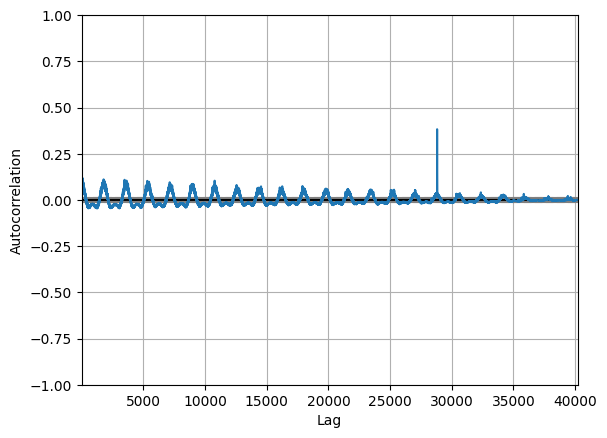

In [8]:
# If strong autocorrelation exists → data is not independent.
autocorrelation_plot(y_t100["w_95th_percentile"])

In [9]:
# corr > 0.2 (rule of thumb) → samples are not independent.
y_t100_cp = y_t100.copy()
y_t100_cp.sort_values("timestamp", inplace=True)
corr = y_t100_cp["w_95th_percentile"].autocorr()
print(corr)

0.8490479692788963


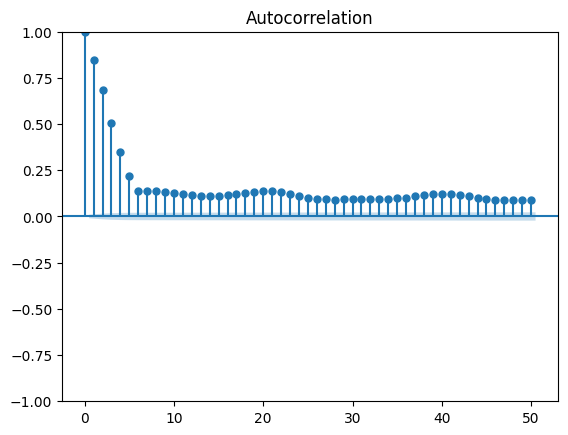

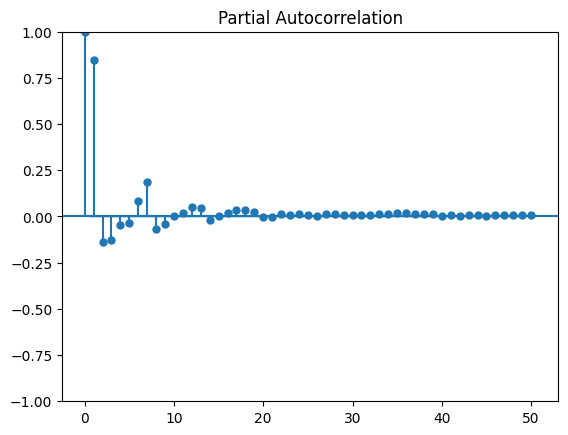

In [11]:
# If autocorrelation drops quickly to ~0 → approximately IID.
# If ACF stays high for many lags → strong temporal dependency → non-IID.
plot_acf(y_t100["w_95th_percentile"], lags=50)
plt.show()

plot_pacf(y_t100["w_95th_percentile"], lags=50)
plt.show()

In [ ]:
# B. Autocorrelation per feature
# Even if target is independent, features can cause dependence.
# Values > 0.2 indicate dependence (rule of thumb).

for col in x_t100.columns:
    if col == "timestamp":
        continue
    print(col, x_t100[col].autocorr())

In [10]:
# C. Durbin–Watson test for independence (regression residuals)
# Interpretation:
#   ≈ 2 → independent
#   < 1.5 → strong positive correlation (non-IID)
#   > 2.5 → strong negative correlation (non-IID)

import statsmodels.api as sm

X = x_t100  # fill in your features
y = y_t100["w_95th_percentile"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(dw)

0.35979991734804095


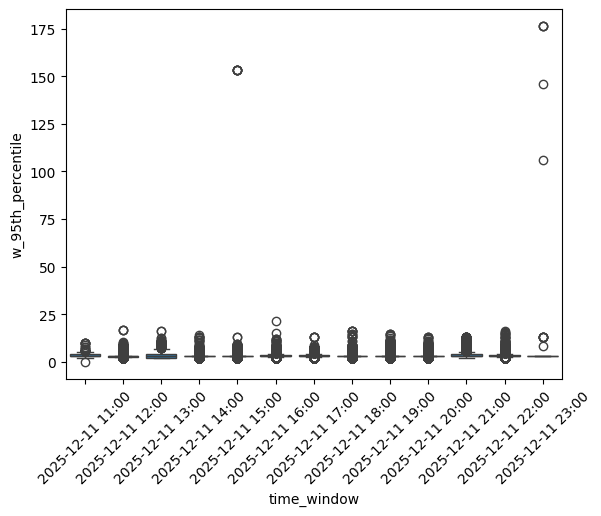

In [20]:
# A. Compare distributions across time windows
# Divide time into chunks (e.g., monthly, weekly) and compare.

# If distributions vary over time → non-IID.

y_t100["dt_column_ts"] = pd.to_datetime(y_t100['timestamp'], unit='s', errors='coerce')
y_t100["time_window"] = y_t100["dt_column_ts"].dt.to_period("h")
# y_t100.head()

import seaborn as sns
sns.boxplot(data=y_t100, x="time_window", y="w_95th_percentile")
plt.xticks(rotation=45)
plt.show()

In [17]:
# B. Statistical test for drift (KS test)
# Compare early vs. late data:
# p < 0.05 → distribution changed → non-IID.

from scipy.stats import ks_2samp

mid = len(y_t100)//2
early = y_t100.iloc[:mid]
late  = y_t100.iloc[mid:]

stat, p = ks_2samp(early["w_95th_percentile"], late["w_95th_percentile"])
print(f"p-value: {p:.4f}")

p-value: 0.0000


<Axes: title={'center': 'Rolling Mean / Rolling Std'}>

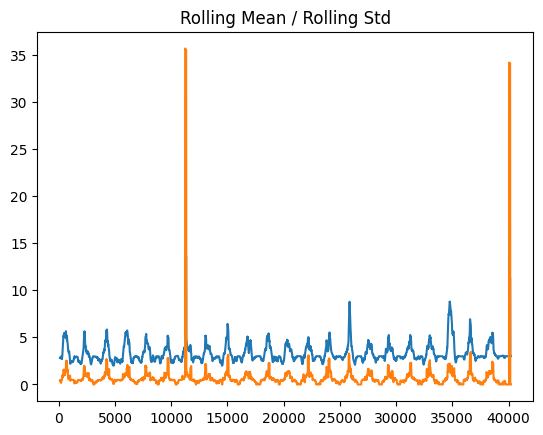

In [18]:
# C. Rolling mean / variance plots
# If mean or variance changes over time → non-IID.
y_t100["w_95th_percentile"].rolling(100).mean().plot(title="Rolling Mean")
y_t100["w_95th_percentile"].rolling(100).std().plot(title="Rolling Mean / Rolling Std")

## T300

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

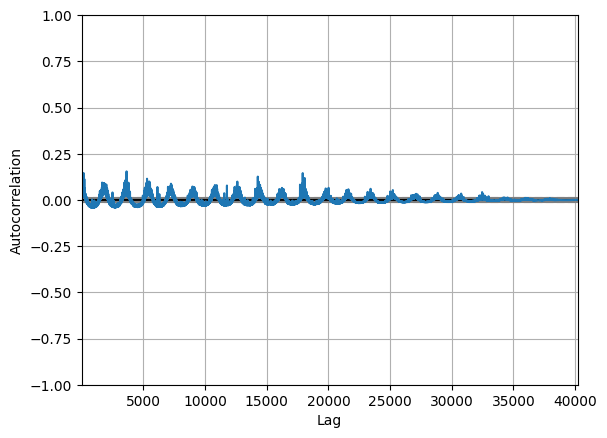

In [22]:
# If strong autocorrelation exists → data is not independent.
autocorrelation_plot(y_t300["w_95th_percentile"])

In [23]:
# corr > 0.2 (rule of thumb) → samples are not independent.
y_t300_cp = y_t300.copy()
y_t300_cp.sort_values("timestamp", inplace=True)
corr = y_t300_cp["w_95th_percentile"].autocorr()
print(corr)

0.7594294759270944


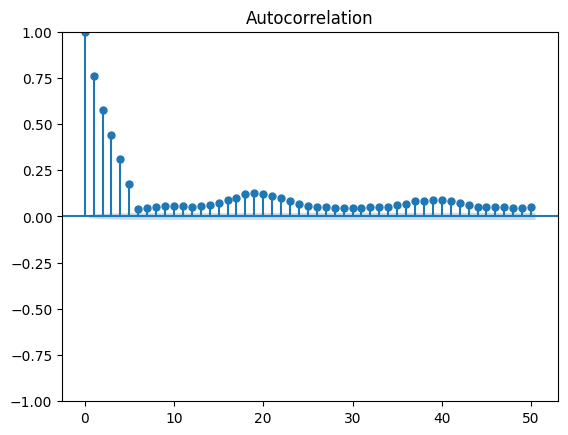

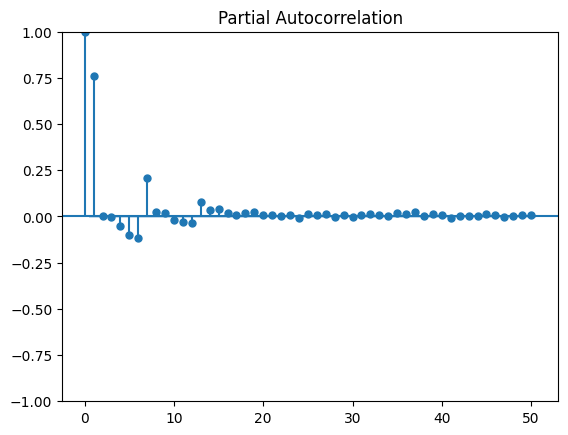

In [24]:
# If autocorrelation drops quickly to ~0 → approximately IID.
# If ACF stays high for many lags → strong temporal dependency → non-IID.
plot_acf(y_t300["w_95th_percentile"], lags=50)
plt.show()

plot_pacf(y_t300["w_95th_percentile"], lags=50)
plt.show()

In [ ]:
# B. Autocorrelation per feature
# Even if target is independent, features can cause dependence.
# Values > 0.2 indicate dependence (rule of thumb).
for col in x_t300.columns:
    if col == "timestamp":
        continue
    print(col, x_t300[col].autocorr())

In [26]:
# C. Durbin–Watson test for independence (regression residuals)
# Interpretation:
#   ≈ 2 → independent
#   < 1.5 → strong positive correlation (non-IID)
#   > 2.5 → strong negative correlation (non-IID)
import statsmodels.api as sm

X = x_t300  # fill in your features
y = y_t300["w_95th_percentile"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(dw)

0.5736951333256224


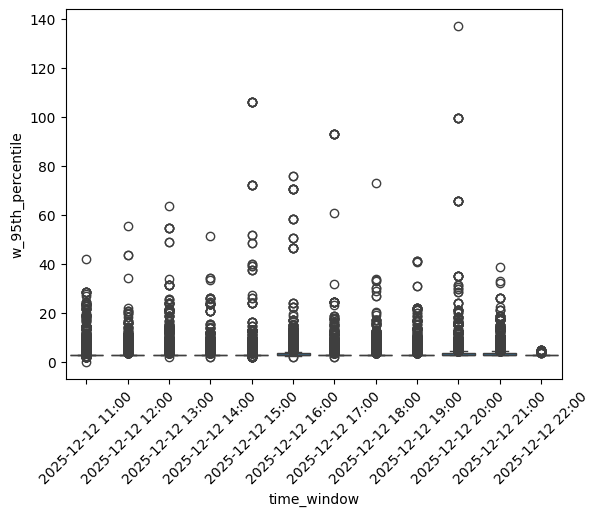

In [27]:
# A. Compare distributions across time windows
# Divide time into chunks (e.g., monthly, weekly) and compare.

# If distributions vary over time → non-IID.

y_t300["dt_column_ts"] = pd.to_datetime(y_t300['timestamp'], unit='s', errors='coerce')
y_t300["time_window"] = y_t300["dt_column_ts"].dt.to_period("h")
# y_t100.head()

import seaborn as sns
sns.boxplot(data=y_t300, x="time_window", y="w_95th_percentile")
plt.xticks(rotation=45)
plt.show()

In [28]:
# B. Statistical test for drift (KS test)
# Compare early vs. late data:
# p < 0.05 → distribution changed → non-IID.

from scipy.stats import ks_2samp

mid = len(y_t300)//2
early = y_t300.iloc[:mid]
late  = y_t300.iloc[mid:]

stat, p = ks_2samp(early["w_95th_percentile"], late["w_95th_percentile"])
print(f"p-value: {p:.4f}")

p-value: 0.0000


<Axes: title={'center': 'Rolling Mean / Rolling Std'}>

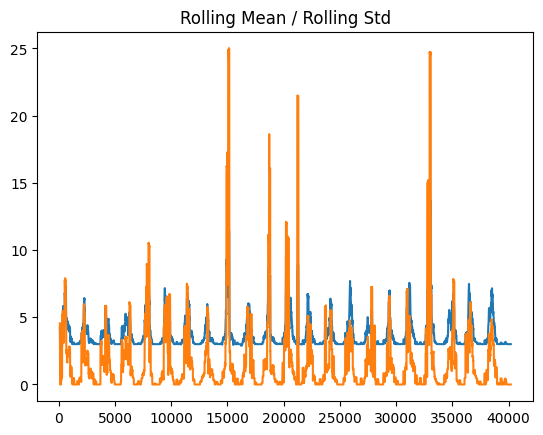

In [29]:
# C. Rolling mean / variance plots
# If mean or variance changes over time → non-IID.
y_t300["w_95th_percentile"].rolling(100).mean().plot(title="Rolling Mean")
y_t300["w_95th_percentile"].rolling(100).std().plot(title="Rolling Mean / Rolling Std")

# T500

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

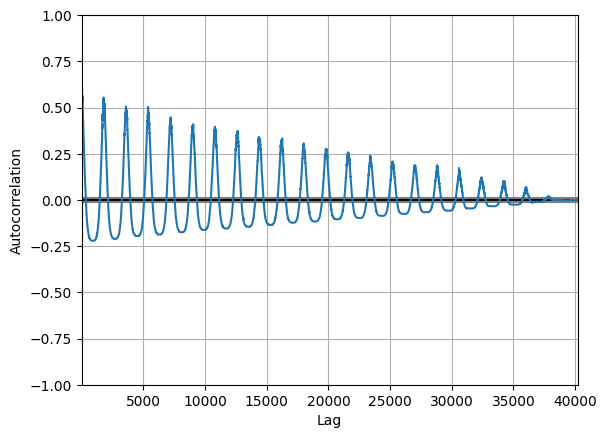

In [30]:
# If strong autocorrelation exists → data is not independent.
autocorrelation_plot(y_t500["w_95th_percentile"])

In [31]:
# corr > 0.2 (rule of thumb) → samples are not independent.
y_t500_cp = y_t500.copy()
y_t500_cp.sort_values("timestamp", inplace=True)
corr = y_t500_cp["w_95th_percentile"].autocorr()
print(corr)

0.9560615792449758


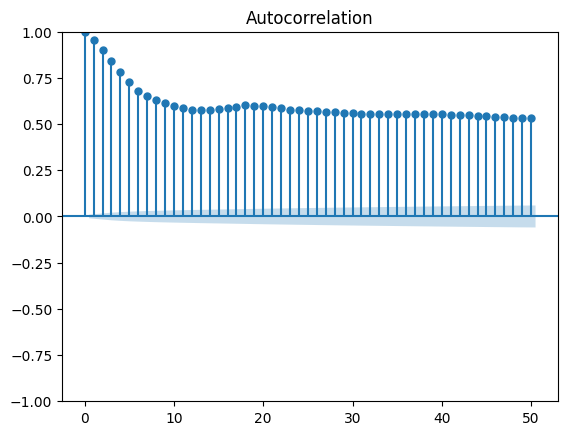

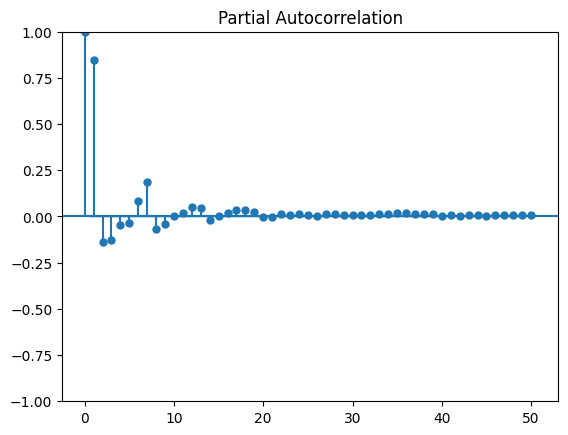

In [32]:
# If autocorrelation drops quickly to ~0 → approximately IID.
# If ACF stays high for many lags → strong temporal dependency → non-IID.
plot_acf(y_t500["w_95th_percentile"], lags=50)
plt.show()

plot_pacf(y_t100["w_95th_percentile"], lags=50)
plt.show()

In [ ]:
# B. Autocorrelation per feature
# Even if target is independent, features can cause dependence.
# Values > 0.2 indicate dependence (rule of thumb).
for col in x_t500.columns:
    if col == "timestamp":
        continue
    print(col, x_t500[col].autocorr())

In [33]:
# C. Durbin–Watson test for independence (regression residuals)
# Interpretation:
#   ≈ 2 → independent
#   < 1.5 → strong positive correlation (non-IID)
#   > 2.5 → strong negative correlation (non-IID)
import statsmodels.api as sm

X = x_t500  # fill in your features
y = y_t500["w_95th_percentile"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(dw)

0.4503296157800505


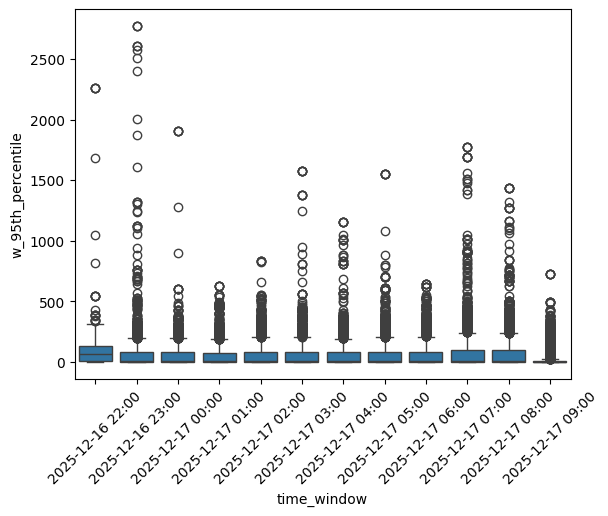

In [36]:
# A. Compare distributions across time windows
# Divide time into chunks (e.g., monthly, weekly) and compare.

# If distributions vary over time → non-IID.

y_t500["dt_column_ts"] = pd.to_datetime(y_t500['timestamp'], unit='s', errors='coerce')
y_t500["time_window"] = y_t500["dt_column_ts"].dt.to_period("h")
# y_t100.head()

import seaborn as sns
sns.boxplot(data=y_t500, x="time_window", y="w_95th_percentile")
plt.xticks(rotation=45)
plt.show()

In [37]:
# B. Statistical test for drift (KS test)
# Compare early vs. late data:
# p < 0.05 → distribution changed → non-IID.

from scipy.stats import ks_2samp

mid = len(y_t100)//2
early = y_t500.iloc[:mid]
late  = y_t500.iloc[mid:]

stat, p = ks_2samp(early["w_95th_percentile"], late["w_95th_percentile"])
print(f"p-value: {p:.4f}")

p-value: 0.0000


<Axes: title={'center': 'Rolling Mean / Rolling Std'}>

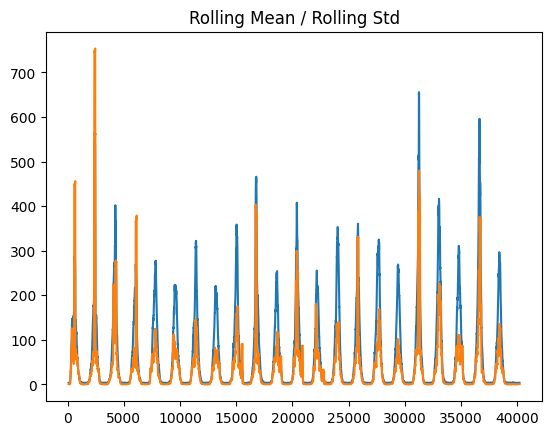

In [38]:
# C. Rolling mean / variance plots
# If mean or variance changes over time → non-IID.
y_t500["w_95th_percentile"].rolling(100).mean().plot(title="Rolling Mean")
y_t500["w_95th_percentile"].rolling(100).std().plot(title="Rolling Mean / Rolling Std")

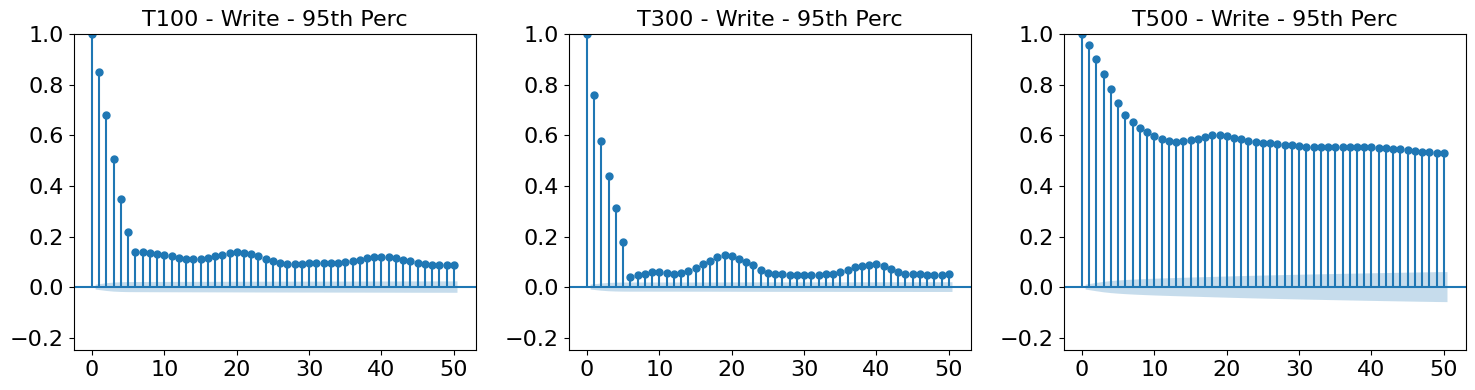

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))


plot_acf(y_t100["w_95th_percentile"], lags=50, ax=axes[0])
axes[0].set_title(f"T100 - Write - 95th Perc", fontsize=16)
axes[0].set_ylim(bottom=-0.25)
axes[0].tick_params(axis='both', labelsize=16)

plot_acf(y_t300["w_95th_percentile"], lags=50, ax=axes[1])
axes[1].set_title(f"T300 - Write - 95th Perc", fontsize=16)
axes[1].set_ylim(bottom=-0.25)
axes[1].tick_params(axis='both', labelsize=16)

plot_acf(y_t500["w_95th_percentile"], lags=50, ax=axes[2])
axes[2].set_title(f"T500 - Write - 95th Perc", fontsize=16)
axes[2].set_ylim(bottom=-0.25)
axes[2].tick_params(axis='both', labelsize=16)

plt.tight_layout()
plt.show()

fig.savefig(f'images/exp_90c_11h_v3/non_iid/plot_acf_oneline.png', dpi=fig.dpi, format='png')

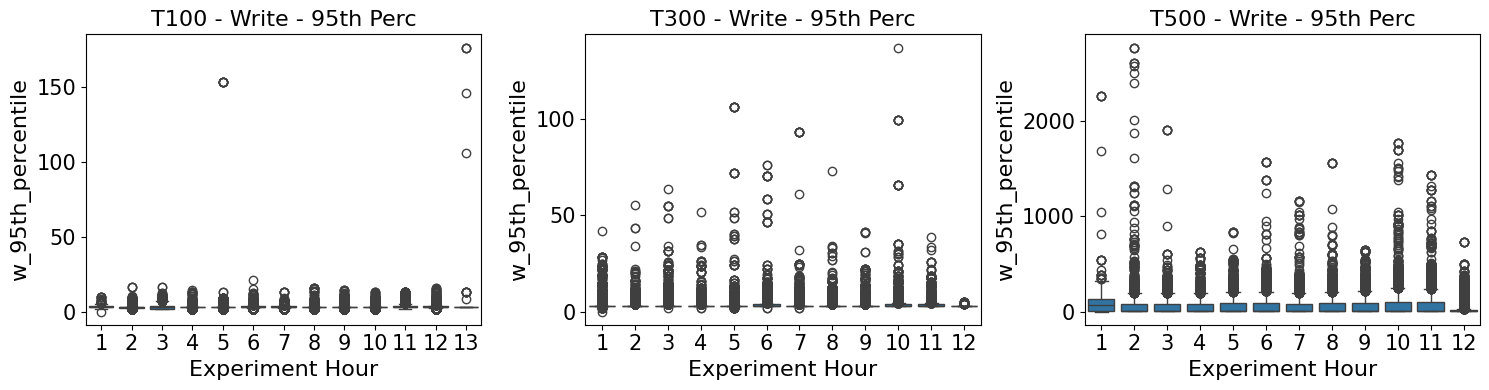

In [24]:
import seaborn as sns

# A. Compare distributions across time windows
# Divide time into chunks (e.g., monthly, weekly) and compare.

# If distributions vary over time → non-IID.
y_t100["dt_column_ts"] = pd.to_datetime(y_t100['timestamp'], unit='s', errors='coerce')
y_t100["time_window"] = y_t100["dt_column_ts"].dt.to_period("h")
y_t100['period_num'] = y_t100['time_window'].rank(method='dense', ascending=True).astype(int)

y_t300["dt_column_ts"] = pd.to_datetime(y_t300['timestamp'], unit='s', errors='coerce')
y_t300["time_window"] = y_t300["dt_column_ts"].dt.to_period("h")
y_t300['period_num'] = y_t300['time_window'].rank(method='dense', ascending=True).astype(int)

y_t500["dt_column_ts"] = pd.to_datetime(y_t500['timestamp'], unit='s', errors='coerce')
y_t500["time_window"] = y_t500["dt_column_ts"].dt.to_period("h")
y_t500['period_num'] = y_t500['time_window'].rank(method='dense', ascending=True).astype(int)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(data=y_t100, x="period_num", y="w_95th_percentile", ax=axes[0])
axes[0].set_title(f"T100 - Write - 95th Perc", fontsize=16)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].set_ylabel("w_95th_percentile", fontsize=16)
axes[0].set_xlabel("Experiment Hour", fontsize=16)

sns.boxplot(data=y_t300, x="period_num", y="w_95th_percentile", ax=axes[1])
axes[1].set_title(f"T300 - Write - 95th Perc", fontsize=16)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].set_ylabel("w_95th_percentile", fontsize=16)
axes[1].set_xlabel("Experiment Hour", fontsize=16)

sns.boxplot(data=y_t500, x="period_num", y="w_95th_percentile", ax=axes[2])
axes[2].set_title(f"T500 - Write - 95th Perc", fontsize=16)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].set_ylabel("w_95th_percentile", fontsize=16)
axes[2].set_xlabel("Experiment Hour", fontsize=16)

plt.tight_layout()
plt.show()

fig.savefig(f'images/exp_90c_11h_v3/non_iid/dist_across_tw_oneline.png', dpi=fig.dpi, format='png')